# Интерполяционный многочлен в форме Ньютона

Написать программу для вычисления интерполяционного многочлена в форме Ньютона и его производной.
Требования к программе:
1. Программа принимает на вход массив с координатами узлов $[x_0, ... , x_n ]$,
и массив значений функции в этих узлах. Нужно реализовать возможность использовать узлы Чебышёва.
2. Программа должна вычислять таблицу разделенных разностей.
3. Программа должна вычислять значение интерполяционного многочлена в любой точке $x$ за $O(n)$.
4. Программа должна вычислять значение производной интерполяционного многочлена в любой точке $x$.
5. Программа должна на одном рисунке строить график функции, многочлена (разными цветами), и значений в узлах интерполяции (маркерами), на другом рисунке - графики производной функции и производной интерполяционного многочлена.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

func = lambda x: np.exp(np.sin(x))

# Задаём количество узлов и границы
n = 50
left = 0
right = 10

In [11]:
# Функция, вычисляющая узлы Чебышёва
def Chebyshev(l, r, m):
    j = np.arange(m)
    tn = ( (right - left) * np.cos(np.pi/(2*m) + np.pi * j / m) + left + right ) / 2
    return tn

In [12]:
# Задаём массив точек
x = np.linspace(left, right, n)
# x = Chebyshev(left, right, n)
print(x)

[  9.99753280e+00   9.97780982e+00   9.93844170e+00   9.87958381e+00
   9.80146843e+00   9.70440384e+00   9.58877313e+00   9.45503262e+00
   9.30371014e+00   9.13540287e+00   8.95077506e+00   8.75055535e+00
   8.53553391e+00   8.30655933e+00   8.06453527e+00   7.81041689e+00
   7.54520708e+00   7.26995250e+00   6.98573945e+00   6.69368960e+00
   6.39495553e+00   6.09071621e+00   5.78217233e+00   5.47054157e+00
   5.15705380e+00   4.84294620e+00   4.52945843e+00   4.21782767e+00
   3.90928379e+00   3.60504447e+00   3.30631040e+00   3.01426055e+00
   2.73004750e+00   2.45479292e+00   2.18958311e+00   1.93546473e+00
   1.69344067e+00   1.46446609e+00   1.24944465e+00   1.04922494e+00
   8.64597129e-01   6.96289865e-01   5.44967379e-01   4.11226872e-01
   2.95596155e-01   1.98531572e-01   1.20416190e-01   6.15582970e-02
   2.21901770e-02   2.46719817e-03]


In [13]:
# Вычисление значения функции в точках
y = []
for i in range(n):
    y.append(func(x[i]))
    
# Построение таблицы разделенных разностей
f = []
for i in range(n):
    f.append([])
    f[i].append(y[i])
    for j in range(1, i+1):
        f[i].append( (f[i][j-1] - f[i-1][j-1]) / (x[i] - x[i-j]) )

# for i in range(n):
#     print(f[i])

In [14]:
# Функция, вычисляющая значения многочлена Ньютона в точке x0
def Newton(x0):
    rez = f[0][0]
    tmp = 1
    for i in range(n-1):
        tmp *= (x0-x[i])
        rez += f[i+1][i+1] * tmp
    return rez

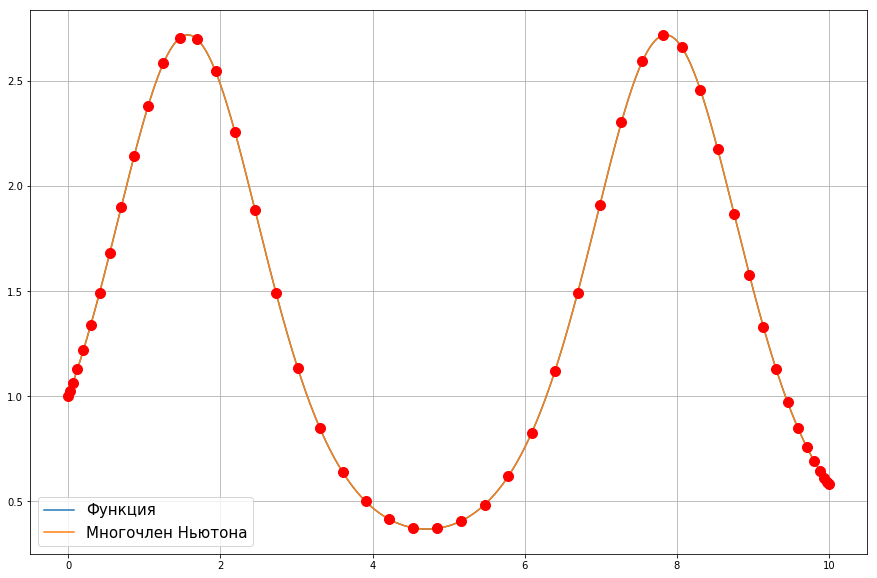

In [15]:
N = 5000
xx = np.linspace(left, right, N)

plt.figure(figsize=(15,10))
plt.plot(xx, func(xx), label = 'Функция')
plt.plot(xx, Newton(xx), label = 'Многочлен Ньютона')
plt.plot(x, y, 'ro', ms = 10)
plt.legend(fontsize = 15)
plt.grid()
plt.show()

# Дифференцирование

In [16]:
# Функция, вычисляющая производную function в точке x0
def differ(x0, function):
    epsil = 0.000000001
    return (function(x0+epsil) - function(x0)) / epsil

In [17]:
# Функция, вычисляющая производную интерполяционного многочлена в точке x0
def diff_polinom(x0):
    rez = 0
    tmp = 1
    temp = 0
    for i in range(n-1):
        temp = temp*(x0-x[i]) + tmp
        tmp = tmp * (x0-x[i])
        rez += f[i+1][i+1] * temp
    return rez

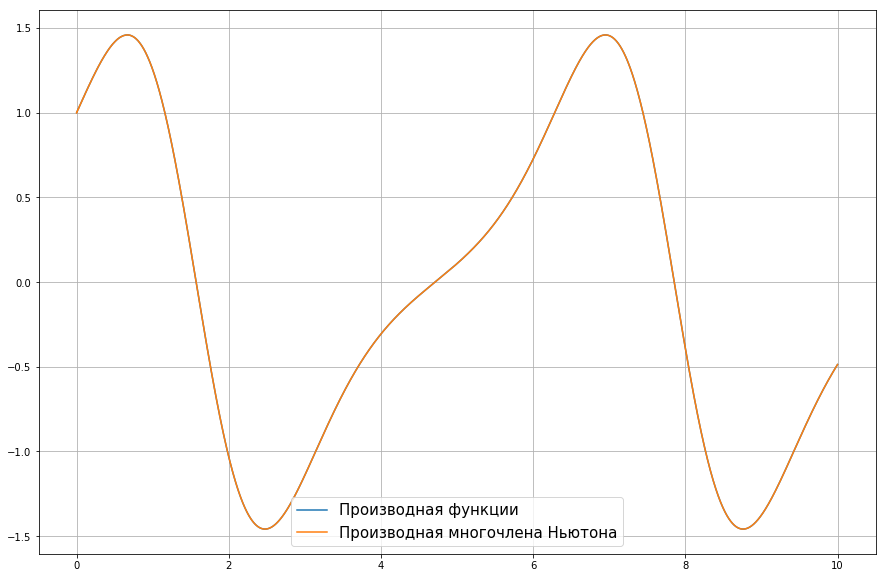

In [18]:
plt.figure(figsize=(15,10))
plt.plot(xx, differ(xx, func), label = 'Производная функции')
plt.plot(xx, diff_polinom(xx), label = 'Производная многочлена Ньютона')
plt.legend(fontsize = 15)
plt.grid()
plt.show()